Load libraries and set configuration parameters

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import utils
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB 
# ==============================   CONFIG     ============================

ABS_PATH= r"C:\Users\carbo\OneDrive\Documenti\Magistrale Carbone\2 sem\Statistical Data Analysis\aPROGETTO\SDAgruppo2"
ABS_PATH = '/mnt/c/Users/marco/Documents/UNISA/SDA/progetto/SDAgruppo2'
DATASET_FILENAME = 'ClassificationData_SDA_AH_group2.csv'
Y_LABEL = 'Z_OppositeTeamDefence'
PREDICTORS_NUMBER = 8

Load the dataset and initialize utilities

In [11]:
from importlib import reload
reload(utils)

class UtilsBayes(utils.Utils):
    def create_classifier(self):
        return GaussianNB()



Class = (utils.Utils, UtilsBayes)[0] #0 = Logistic regression, 1 = GaussianNB

utils_ = Class(ABS_PATH, DATASET_FILENAME, Y_LABEL, PREDICTORS_NUMBER)
df = utils_.read_dataset()


SyntaxError: keyword argument repeated (utils.py, line 27)

BASE LOGISTIC REGRESSION

In [7]:
model, X, y = utils_.train(df,return_values=True)
score = utils_.inspect_model(model, X, y, n=100, k=5)
print('CV accuracy:', score)

CV accuracy: 0.9459499999999995


Analyze possible interactions through the heatmap

<AxesSubplot:>

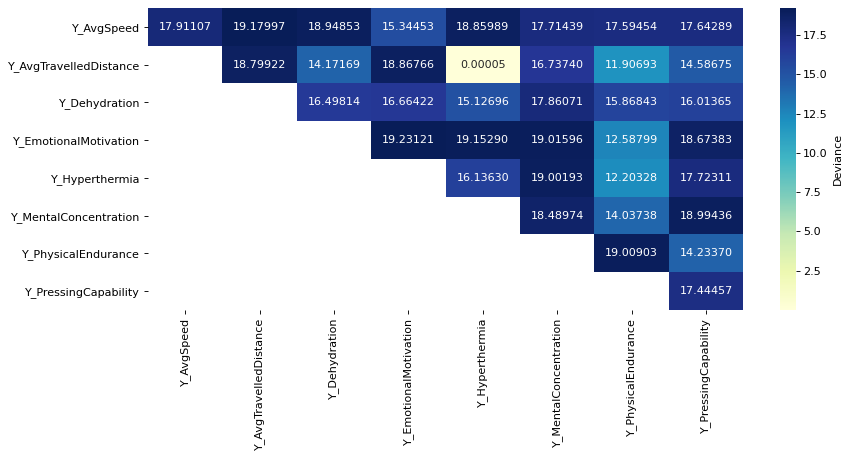

In [8]:
plt.figure(figsize=(12, 5), dpi=80)
utils_.plot_heatmap(df)

Perform best subset selection, specifying possible interactions or squared terms

100%|██████████| 256/256 [01:05<00:00,  3.90it/s]

         87783519 function calls (86013383 primitive calls) in 65.640 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.008    0.008   65.640   65.640 /home/marco741/SDAgruppo2/utils.py:132(best_subset)
7905/1530    0.139    0.000   64.122    0.042 /home/marco741/SDAgruppo2/venv/lib/python3.8/site-packages/joblib/parallel.py:958(__call__)
20910/8160    0.206    0.000   64.015    0.008 /home/marco741/SDAgruppo2/venv/lib/python3.8/site-packages/joblib/parallel.py:796(dispatch_one_batch)
904416/31863    0.815    0.000   63.641    0.002 /home/marco741/SDAgruppo2/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:59(inner_f)
      255    0.009    0.000   62.406    0.245 /home/marco741/SDAgruppo2/utils.py:72(inspect_model)
     1275    0.015    0.000   62.356    0.049 /home/marco741/SDAgruppo2/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:41(cross_validate)
13005/6630    0.052   

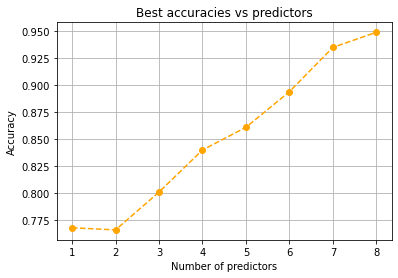

In [15]:
from importlib import reload
reload(utils)
utils_ = utils.Utils(ABS_PATH, DATASET_FILENAME, Y_LABEL, PREDICTORS_NUMBER)
df = utils_.read_dataset()

possible_interactions =  (
    # ('Y_AvgTravelledDistance', 'Y_PhysicalEndurance'),
    # ('Y_EmotionalMotivation',  'Y_PhysicalEndurance'),
    # ('Y_Hyperthermia',         'Y_PhysicalEndurance'),
    # ('Y_AvgTravelledDistance', 'Y_PhysicalEndurance'),
    # ('Y_MentalConcentration',  'Y_Dehydration'),
)
subsets = utils_.best_subset(df, possible_interactions, nfolds = 5, nCV = 5, verbose=True)
# print(perfect_separations)

In [ ]:
for i in range(1,10+1):
    print('number of predictors:',i)
    print('\tdeviance:',subsets['deviances'][i],
        '\n\taccuracy:',subsets['accuracies'][i],
        '\n\tperfect :', subsets['perfect separation'][i])

number of predictors: 1
	deviance: 200.3067888853774 
	accuracy: 0.75 
	perfect : False
number of predictors: 2
	deviance: 195.440751920207 
	accuracy: 0.77 
	perfect : False
number of predictors: 3
	deviance: 157.34962301633627 
	accuracy: 0.82 
	perfect : False
number of predictors: 4
	deviance: 118.81811493693765 
	accuracy: 0.835 
	perfect : False
number of predictors: 5
	deviance: 117.50527891830768 
	accuracy: 0.85 
	perfect : False
number of predictors: 6
	deviance: 103.89445933862186 
	accuracy: 0.8700000000000001 
	perfect : False
number of predictors: 7
	deviance: 98.4448247970428 
	accuracy: 0.875 
	perfect : False
number of predictors: 8
	deviance: 59.52612255477836 
	accuracy: 0.905 
	perfect : False
number of predictors: 9
	deviance: 24.037145025890613 
	accuracy: 0.9349999999999999 
	perfect : False
number of predictors: 10
	deviance: 0 
	accuracy: 0.9650000000000001 
	perfect : True
